# WAMM fire case study <img align="right" src="../Supplementary_data/dea_logo.jpg">

* **Compatability:** Notebook currently compatible with the `NCI`|`DEA Sandbox` environment only
* **Products used:** 
[s2a_ard_granule](https://explorer.sandbox.dea.ga.gov.au/s2a_ard_granule), 
[s2b_ard_granule](https://explorer.sandbox.dea.ga.gov.au/s2b_ard_granule),
[ga_ls5t_ard_3](https://explorer.sandbox.dea.ga.gov.au/ga_ls5t_ard_3),
[ga_ls7e_ard_3](https://explorer.sandbox.dea.ga.gov.au/ga_ls7e_ard_3),
[ga_ls8c_ard_3](https://explorer.sandbox.dea.ga.gov.au/ga_ls8c_ard_3)
* **Special requirements:** An _optional_ description of any special requirements, e.g. If running on the [NCI](https://nci.org.au/), ensure that `module load otps` is run prior to launching this notebook
* **Prerequisites:** An _optional_ list of any notebooks that should be run or content that should be understood prior to launching this notebook


## Background
An *optional* overview of the scientific, economic or environmental management issue or challenge being addressed by Digital Earth Australia. 
For `Beginners_Guide` or `Frequently_Used_Code` notebooks, this may include information about why the particular technique or approach is useful or required. 
If you need to cite a scientific paper or link to a website, use a persistent DOI link if possible and link in-text (e.g. [Dhu et al. 2017](https://doi.org/10.1080/20964471.2017.1402490)).

## Description
A _compulsory_ description of the notebook, including a brief overview of how Digital Earth Australia helps to address the problem set out above.
It can be good to include a run-down of the tools/methods that will be demonstrated in the notebook:

1. First we do this
2. Then we do this
3. Finally we do this

***

## Getting started

Provide any particular instructions that the user might need, e.g. To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell. 

### Load packages
Import Python packages that are used for the analysis.

Use standard import commands; some are shown below. 
Begin with any `iPython` magic commands, followed by standard Python packages, then any additional functionality you need from the `Scripts` directory.

In [1]:
import numpy as np
import requests
import pandas as pd
import geopandas as gpd
from shapely.geometry import shape
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt


In [54]:
!ffmpeg -y -r 36 -i hotspots_%d.jpeg -c:v libx264 -vf crop=720:900:10:10 -pix_fmt yuv420p out.mp4

ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

## Analysis

In [20]:
from_date = '2019-09-01'
to_date = '2020-01-05'
max_features = 500000
url = f"https://hotspots.dea.ga.gov.au/geoserver/public/wfs?service=WFS&version=1.1.0&request=GetFeature&typeName=public:hotspots&outputFormat=application/json&CQL_FILTER=((sensor=%27AVHRR%27%20AND%20(product=%27SRSS%27))%20OR%20(sensor=%27MODIS%27%20AND%20(product=%27MOD14%27))%20OR%20(sensor=%27VIIRS%27%20AND%20(product=%27AFMOD%27%20OR%20product=%27EDR%27)))%20AND%20datetime%20%3E%20%27{from_date}%27%20AND%20datetime%20%3C%20%27{to_date}%27%20AND%20INTERSECTS(location,%20POLYGON((-39.21%20144.07,%20-39.21%20154.42,%20-26.07%20154.42,%20-26.07%20144.07,%20-39.21%20144.07)))&maxFeatures={max_features}&startIndex=0&sortBy=sensor%20A"
hotspots_gdf = gpd.read_file(url)

hotspots_gdf['datetime'] = pd.to_datetime(hotspots_gdf['stop_dt'])  #pd.to_datetime(hotspots_df.datetime)
hotspots_gdf['hours_since_hotspot'] = (((hotspots_gdf['datetime'].max() - hotspots_gdf['datetime'])).astype('timedelta64[m]') / 60)
# hotspots_gdf = hotspots_gdf.rename({'confidence': 'properties_confidence', 'australian_state': 'properties_australian_state'}, axis=1)

In [27]:
# hotspots_subset = hotspots_gdf.loc[:,['datetime', 'latitude', 'longitude', 'hours_since_hotspot', 'confidence']]
# hotspots_subset.sort_values('datetime', ascending=True, inplace=True)
pd.DataFrame(hotspots_subset).to_csv('hotspots.csv')

In [30]:
import zipfile
import os

zip_name = 'hotspots.zip'
output_dir = ''

# Extract into output_dir
with zipfile.ZipFile(zip_name, 'r') as zip_ref:        
    zip_ref.extractall(output_dir)        
    print(f'Unzipping output files to: '
          f'{output_dir if output_dir else os.getcwd()}')

Unzipping output files to: /home/jovyan/dev/dea-notebooks/Testing


In [ ]:
hotspots_gdf = gpd.read_file('hotspots.json')

In [ ]:
hotspots_subset = hotspots_gdf.cx[144.07:154.42, -26.07:-39.21]


In [ ]:
hotspots_subset = hotspots_subset.loc[hotspots_subset.confidence > 25]
hotspots_subset['datetime'] = pd.to_datetime(hotspots_subset['start_dt'])  #pd.to_datetime(hotspots_df.datetime)
hotspots_subset['hours_since_hotspot'] = (((hotspots_subset['datetime'].max() - hotspots_subset['datetime'])).astype('timedelta64[m]') / 60)
hotspots_subset = hotspots_subset.loc[:,['datetime', 'latitude', 'longitude', 'hours_since_hotspot', 'confidence']]
hotspots_subset.sort_values('datetime', ascending=True, inplace=True)
pd.DataFrame(hotspots_subset).to_csv('hotspots.csv')

In [3]:
# hotspots_subset = hotspots_gdf.cx[152.7:152.97, -29.13:-29.39]
# hotspots_subset = hotspots_gdf.cx[153.109276:153.536262, -29.088705:-29.576515]
# hotspots_subset = hotspots_gdf.cx[149.4037:149.78692, -35.26300:-35.54005]
hotspots_subset = hotspots_gdf.cx[147.869445:148.065825, -42.025447:-42.164544]


        
# hotspots_subset = hotspots_subset.loc[hotspots_subset.properties_hours_since_hotspot > 5]


# hotspots_subset = hotspots_subset.loc[hotspots_subset.properties_process_algorithm != 'GA AVHRR']
hotspots_subset = hotspots_subset.sort_values('properties_hours_since_hotspot', ascending=True)
hotspots_subset = hotspots_subset.to_crs({'init': 'epsg:3577'})

hotspots_recent = hotspots_subset.loc[
    (hotspots_subset.properties_hours_since_hotspot < 20) &
    (hotspots_subset.properties_confidence > 20)]


In [12]:
hotspots_subset.to_crs({'init': 'EPSG:4326'}).to_file('current_hotspots.geojson', driver='GeoJSON')

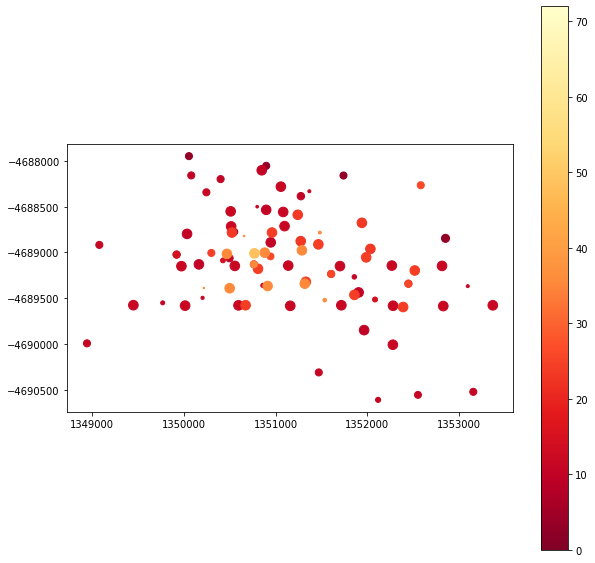

In [4]:
hotspots_subset.plot(column='properties_hours_since_hotspot',
                     cmap='YlOrRd_r',
                     markersize=100 - hotspots_subset['properties_confidence'],
                     figsize=(10, 10),
                     legend=True,
                     vmin=0,
                     vmax=72)


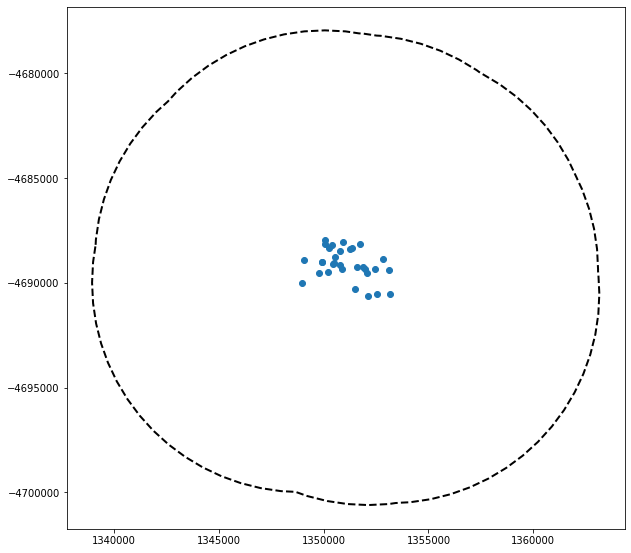

In [13]:
hotspots_recent_buffered = hotspots_recent.dissolve(by='properties_australian_state').buffer(10000)
hotspots_recent.plot(figsize=(10, 10))
hotspots_recent_buffered.plot(
    ax=plt.gca(),
    facecolor='none',
    edgecolor='black',
    linewidth=2,
    linestyle='--')



In [14]:
hotspots_recent_buffered.to_file('current_hotspots_buffer.geojson', driver='GeoJSON')

## Keep WAMM polygons

In [7]:
wamm_data = gpd.read_file('AusWaterBodies_20191119_snapshot.shp')
wamm_data['geometry'] = wamm_data.geometry.centroid
wamm_data = wamm_data.loc[:,['20191116', 'Pc20191116', 'area', 'geometry']]
wamm_data.columns = ['date', 'percent_full', 'area', 'geometry']

wamm_data['area_full'] = (wamm_data.percent_full / 100) * wamm_data['area']
wamm_data['min_area'] = np.where(wamm_data['area_full'] > 630, 'Potentially suitable', 'Too dry/small')
wamm_data['min_area_bool'] = np.where(wamm_data['area_full'] > 630, 1, 0)
wamm_data = wamm_data.sort_values('min_area', ascending=False)

is_within = wamm_data.geometry.intersects(hotspots_recent_buffered.unary_union)
wamm_data_subset = wamm_data.loc[is_within]


In [8]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
fire_cmap = ListedColormap(['midnightblue', 'lightgrey'])

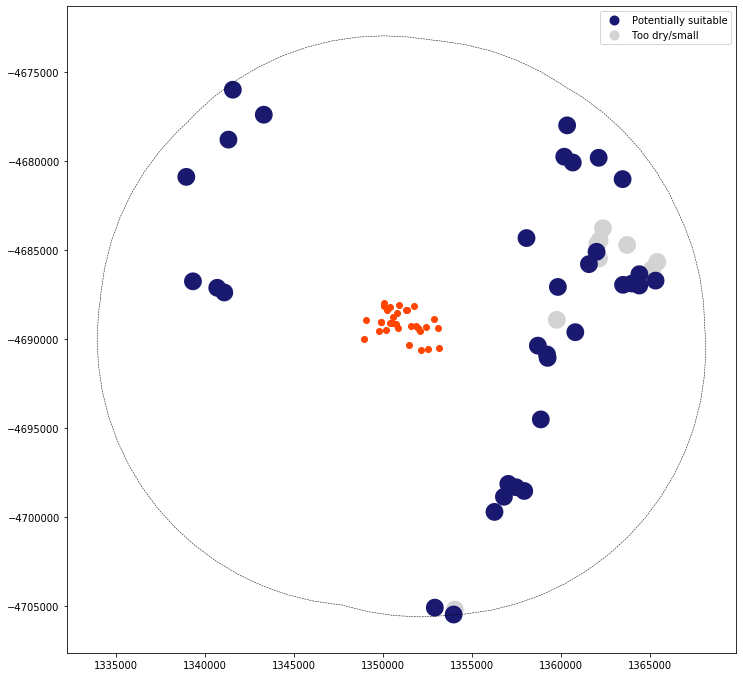

In [9]:
wamm_data_subset_plot = wamm_data_subset.copy()
wamm_data_subset_plot['geometry'] = wamm_data_subset_plot.buffer(500)
wamm_data_subset_plot.plot(column='min_area', figsize=(12, 12), categorical=True, legend=True, cmap=fire_cmap)
hotspots_recent.plot(ax=plt.gca(), c='orangered', label='Active fires')
hotspots_recent_buffered.plot(
    ax=plt.gca(),
    facecolor='none',
    edgecolor='black',
    linewidth=0.5,
    linestyle='--')


In [10]:
wamm_data_subset.to_crs({'init': 'EPSG:4326'}).to_file('wamm_polygons.geojson', driver='GeoJSON') 

***

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Australia data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/GeoscienceAustralia/dea-notebooks).

**Last modified:** October 2019

**Compatible datacube version:** 

In [ ]:
print(datacube.__version__)

## Tags
Browse all available tags on the DEA User Guide's [Tags Index](https://docs.dea.ga.gov.au/genindex.html)